In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tqdm import tqdm
import itertools
from tensorflow.keras.models import load_model
import random
from tensorflow.keras.preprocessing import image
from matplotlib import interactive
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import matplotlib.image as mpimg


img_width, img_height = 150, 150

train_data_dir = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/train"
validation_data_dir = "C:/Users/20115/Desktop/Covid_Phenomena_Dataset/validation"
nb_train_samples = 753
nb_validation_samples = 201
epochs = 20
batch_size = 16

if K.image_data_format() == 'channels_last':
    input_shape = (img_width, img_height,3)
else:
    input_shape = (3, img_width, img_height)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=input_shape))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(3 , activation='softmax'))


loss='categorical_crossentropy'



model.compile(loss=loss,
              optimizer='rmsprop',
              metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=16,class_mode='categorical')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('third.h5')



print(model.summary())
model.save('Covid_Phenomena_5.model')

Found 753 images belonging to 3 classes.
Found 201 images belonging to 3 classes.
Epoch 1/20
47/47 [==============================] - 69s 1s/step - loss: 2.3834 - accuracy: 0.4410 - val_loss: 0.8029 - val_accuracy: 0.5990
Epoch 2/20
47/47 [==============================] - 93s 2s/step - loss: 1.0229 - accuracy: 0.6147 - val_loss: 1.1915 - val_accuracy: 0.6771
Epoch 3/20
47/47 [==============================] - 103s 2s/step - loss: 0.8518 - accuracy: 0.6621 - val_loss: 0.3147 - val_accuracy: 0.8698
Epoch 4/20
47/47 [==============================] - 101s 2s/step - loss: 0.5644 - accuracy: 0.7815 - val_loss: 0.5057 - val_accuracy: 0.7917
Epoch 5/20
47/47 [==============================] - 85s 2s/step - loss: 0.4887 - accuracy: 0.7992 - val_loss: 0.2624 - val_accuracy: 0.8750
Epoch 6/20
47/47 [==============================] - 63s 1s/step - loss: 0.3898 - accuracy: 0.8385 - val_loss: 0.3077 - val_accuracy: 0.8333
Epoch 7/20
47/47 [==============================] - 64s 1s/step - loss: 0.31

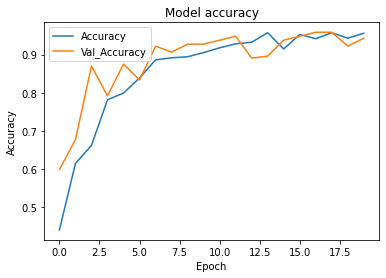

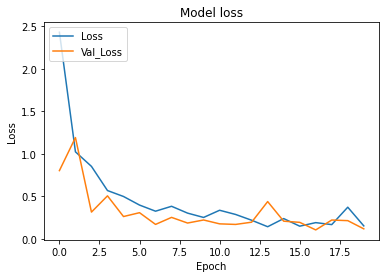

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='upper left')
plt.show()